## 278 - How to Plot Individual US Counties in Python

[Youtube](https://www.youtube.com/watch?v=X706iRqe1hA)

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import pandas as pd
from metpy.cbook import get_test_data

In [2]:
get_test_data('us_counties_500k.shp', as_file_obj=False)
get_test_data('us_counties_500k.shx', as_file_obj=False)
get_test_data('us_counties_500k.dbf', as_file_obj=False)

'/home/jessica/.cache/metpy/v1.3.1/us_counties_500k.dbf'

In [3]:
for rec in shpreader.Reader(get_test_data('us_counties_500k.shp', as_file_obj=False)).records():
    print(rec)
    break

Record(POLYGON ((-92.41199499999999 41.509547999999995, -92.355389 41.509646, -92.345287 41.509676999999996, -92.297494 41.509789999999995, -92.28764199999999 41.509828, -92.224604 41.509901, -92.200892 41.510019, -92.181784 41.510038, -92.156622 41.510155999999995, -92.08191599999999 41.510295, -92.078941 41.510301999999996, -92.07643999999999 41.510293, -92.071452 41.510371, -92.065058 41.510403, -92.05167399999999 41.510436999999996, -92.04251 41.510411999999995, -92.039328 41.510635, -92.037284 41.510481999999996, -91.94604299999999 41.510749, -91.94614399999999 41.461059999999996, -91.946235 41.453165999999996, -91.946643 41.424634, -91.94644799999999 41.410126, -91.946612 41.381347999999996, -91.946697 41.370201, -91.946713 41.366589, -91.94668999999999 41.364258, -91.94674499999999 41.359367, -91.946815 41.352078, -91.946935 41.337579999999996, -91.94509099999999 41.251386, -91.944762 41.240378, -91.944743 41.236264999999996, -91.94464099999999 41.222029, -91.945571 41.163578, -

In [4]:
rec.attributes

{'STATEFP': '19',
 'COUNTYFP': '107',
 'COUNTYNS': '00465242',
 'AFFGEOID': '0500000US19107',
 'GEOID': '19107',
 'NAME': 'Keokuk',
 'LSAD': '06',
 'ALAND': 1500067253,
 'AWATER': 1929323}

In [5]:
fips = pd.read_csv('FIPS_CountyName.txt', index_col='fips')

In [6]:
fips.head()

,name,state
fips,,
1001,Autauga County,AL
1003,Baldwin County,AL
1005,Barbour County,AL
1007,Bibb County,AL
1009,Blount County,AL


In [7]:
fips.loc[19107]

name     Keokuk County
state               IA
Name: 19107, dtype: object

In [8]:
county_shapes = {}
for rec in shpreader.Reader(get_test_data('us_counties_500k.shp', as_file_obj=False)).records():
    fips_code = int(rec.attributes['GEOID'])
    try:
        state_name = fips.loc[fips_code]['state']
        county_name = fips.loc[fips_code]['name']
        state_dict = county_shapes.get(state_name, {})
        state_dict[county_name] = rec
        county_shapes[state_name] = state_dict
    except KeyError:
        print(f'Cannot find FIPS {fips_code}')

Cannot find FIPS 60010
Cannot find FIPS 60040
Cannot find FIPS 60050
Cannot find FIPS 69100
Cannot find FIPS 72023
Cannot find FIPS 72031
Cannot find FIPS 72039
Cannot find FIPS 72065
Cannot find FIPS 72097
Cannot find FIPS 72113
Cannot find FIPS 72135
Cannot find FIPS 72141
Cannot find FIPS 78010
Cannot find FIPS 78020
Cannot find FIPS 72053
Cannot find FIPS 72147
Cannot find FIPS 60020
Cannot find FIPS 69110
Cannot find FIPS 72037
Cannot find FIPS 66010
Cannot find FIPS 72151
Cannot find FIPS 2158
Cannot find FIPS 72127
Cannot find FIPS 69120
Cannot find FIPS 72021
Cannot find FIPS 72027
Cannot find FIPS 72033
Cannot find FIPS 72001
Cannot find FIPS 72017
Cannot find FIPS 72019
Cannot find FIPS 60030
Cannot find FIPS 69085
Cannot find FIPS 72013
Cannot find FIPS 72015
Cannot find FIPS 72003
Cannot find FIPS 72005
Cannot find FIPS 72007
Cannot find FIPS 72079
Cannot find FIPS 72081
Cannot find FIPS 72043
Cannot find FIPS 72049
Cannot find FIPS 72055
Cannot find FIPS 72057
Cannot find 

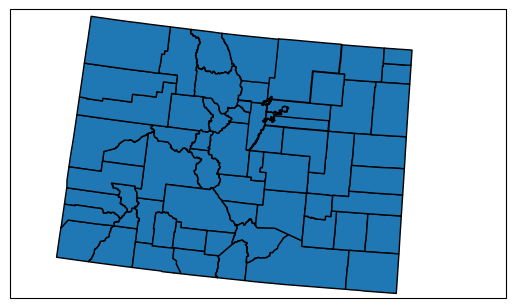

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

for name, rec in county_shapes['CO'].items():
    ax.add_geometries([rec.geometry], crs=ccrs.PlateCarree(), edgecolor='black')
    
ax.set_extent((-110, -100, 37, 41))

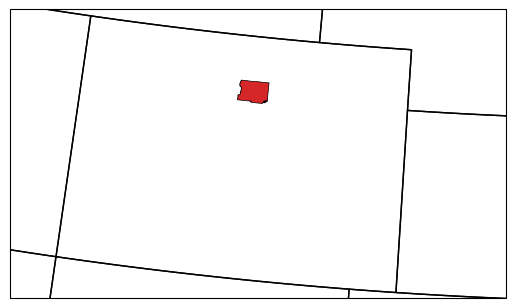

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

rec = county_shapes['CO']['Boulder County']
ax.add_geometries([rec.geometry], crs=ccrs.PlateCarree(), edgecolor='black', linewidth=0.5, facecolor='tab:red')
ax.add_feature(cfeature.STATES)
ax.set_extent((-110, -100, 37, 41))